## Importing the Dataset

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [106]:
ds = pd.read_csv("/content/diabetes_prediction_dataset.csv")
ds.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


## Exploring the Dataset

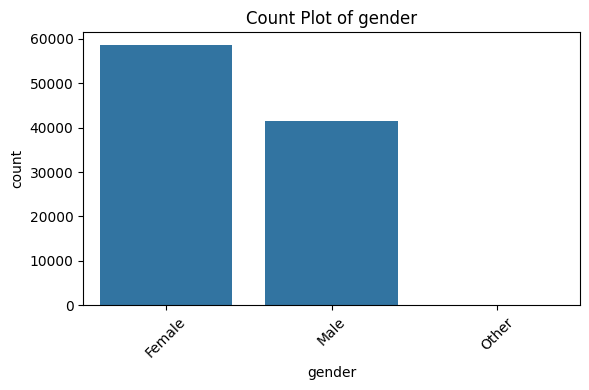

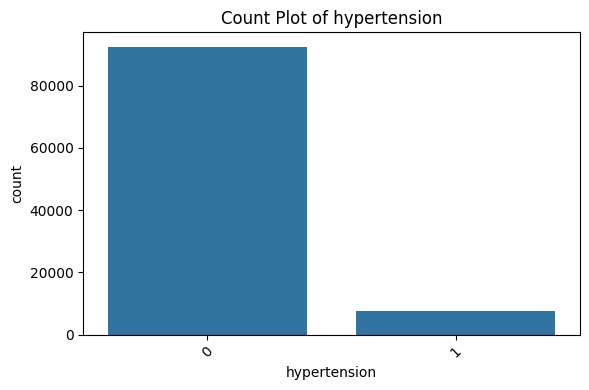

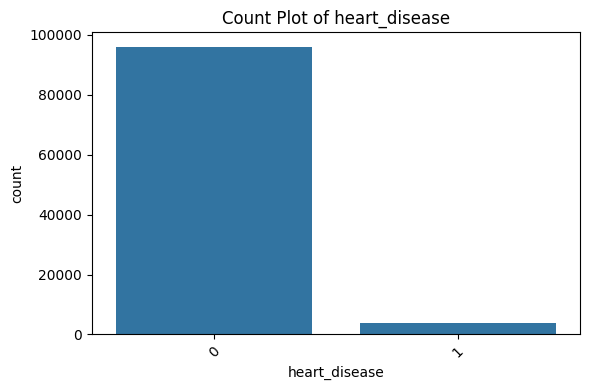

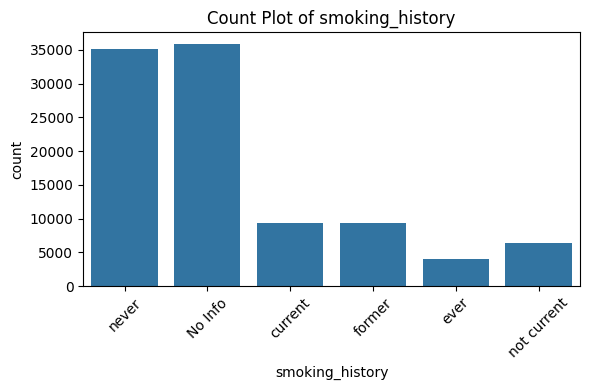

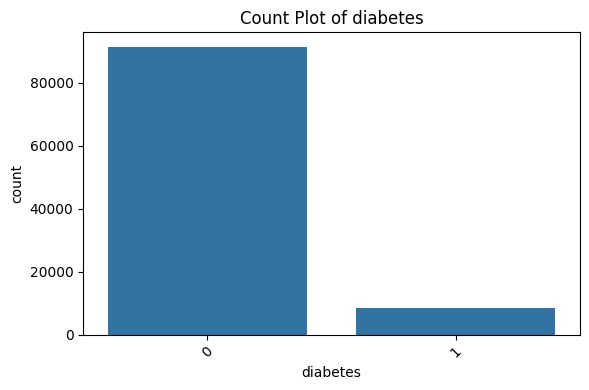

In [107]:
# Categorical columns
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=ds, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


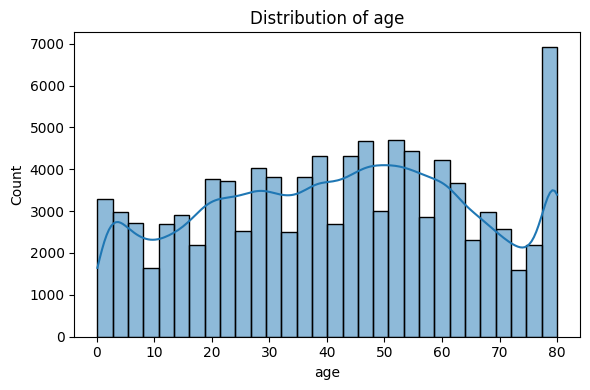

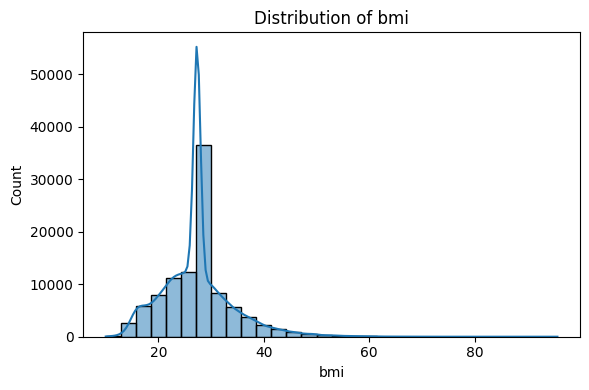

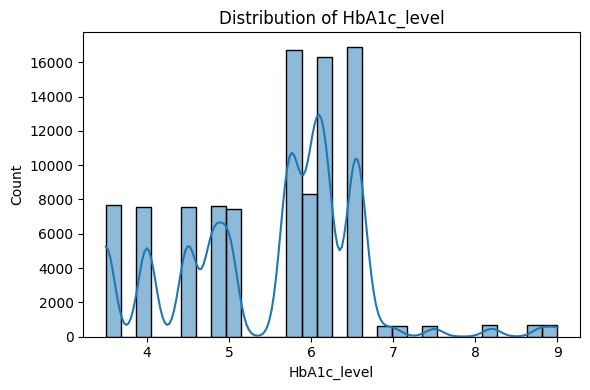

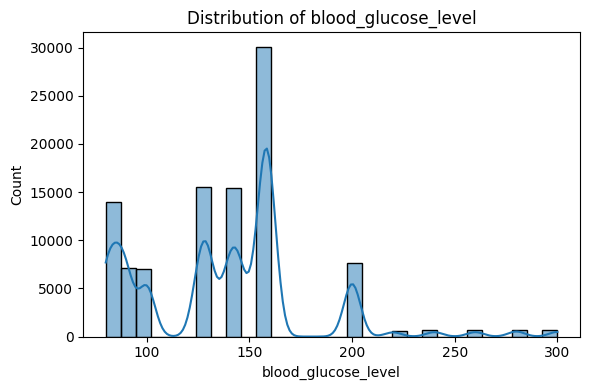

In [108]:
# Numerical columns
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=ds, x=col, bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

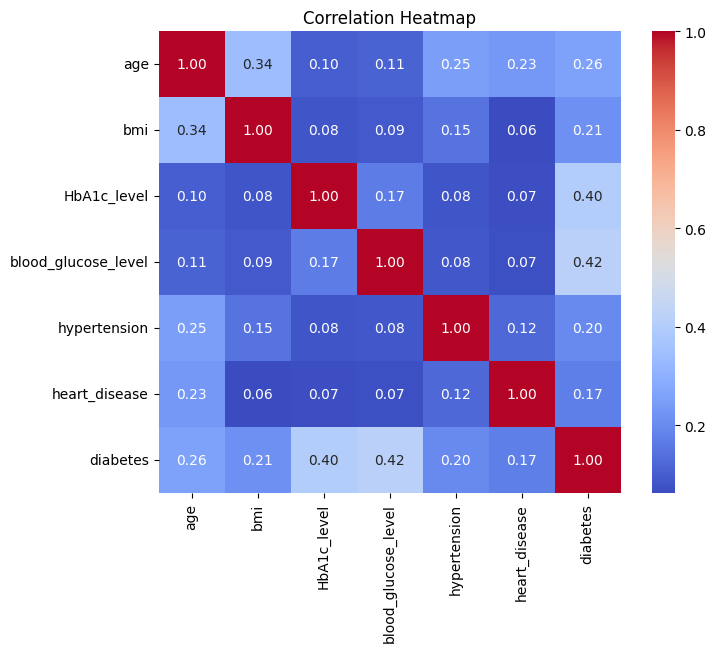

In [109]:
import numpy as np

corr_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease', 'diabetes']
corr_matrix = ds[corr_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

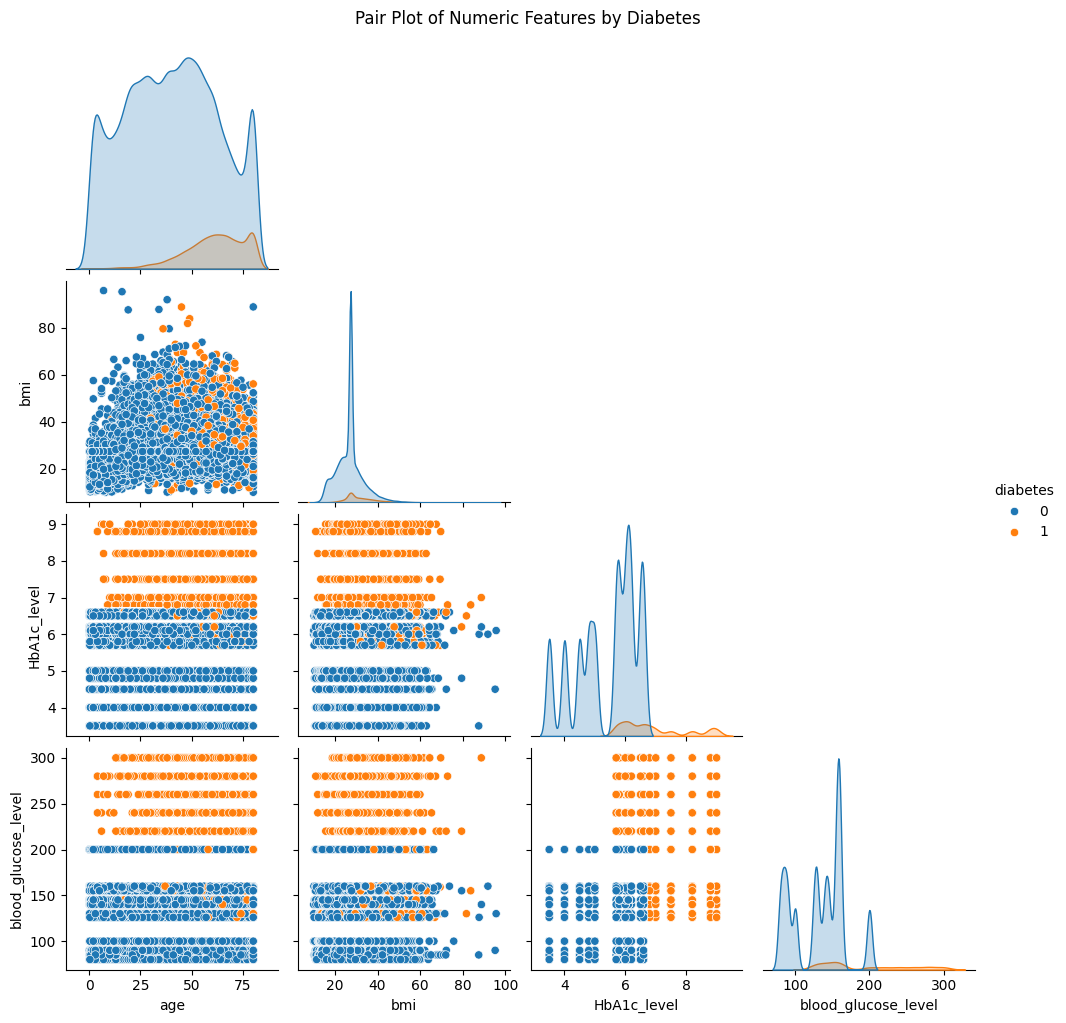

In [110]:
sns.pairplot(ds, vars=['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'], hue='diabetes', corner=True)
plt.suptitle("Pair Plot of Numeric Features by Diabetes", y=1.02)
plt.show()

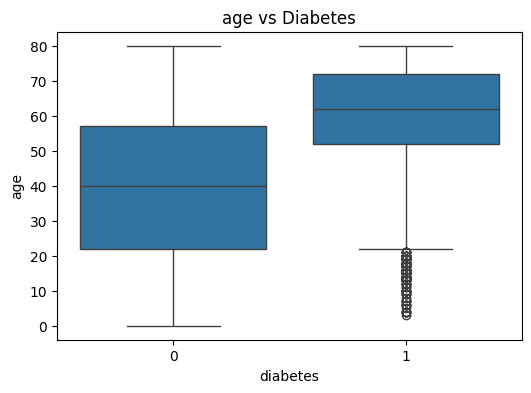

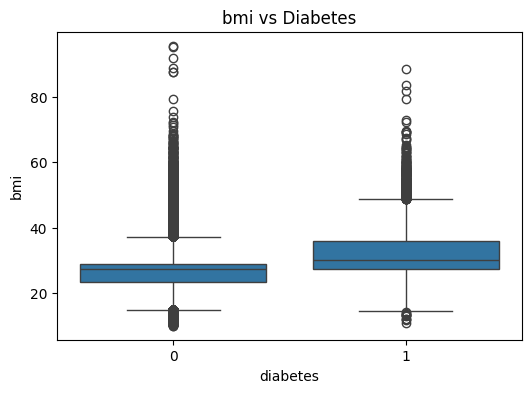

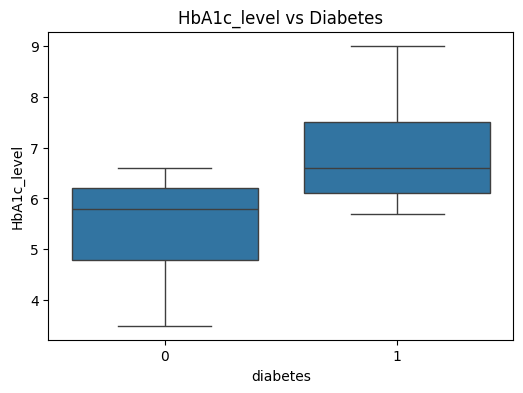

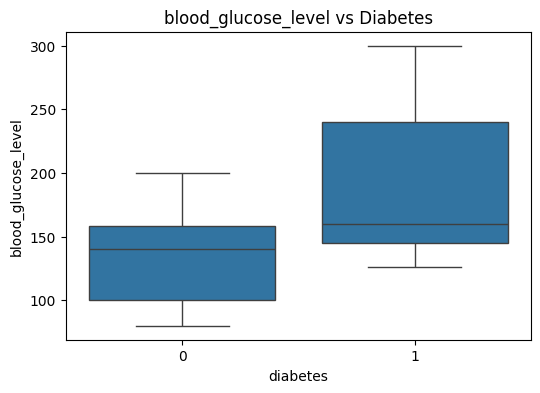

In [111]:
for col in ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='diabetes', y=col, data=ds)
    plt.title(f'{col} vs Diabetes')
    plt.show()


## Preprocessing

In [112]:
ds.gender.value_counts()

,count
gender,
Female,58552
Male,41430
Other,18


In [113]:
# Filter out 'Other' in gender (they are only 18 rows)
ds = ds[ds['gender'].isin(['Male', 'Female'])]

# Encoding Male as 0, Female as 1
ds['gender'] = ds['gender'].map({'Male': 0, 'Female': 1})

ds.head(10)

<ipython-input-113-cd8a3ec77a4b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['gender'] = ds['gender'].map({'Male': 0, 'Female': 1})


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,never,25.19,6.6,140,0
1,1,54.0,0,0,No Info,27.32,6.6,80,0
2,0,28.0,0,0,never,27.32,5.7,158,0
3,1,36.0,0,0,current,23.45,5.0,155,0
4,0,76.0,1,1,current,20.14,4.8,155,0
5,1,20.0,0,0,never,27.32,6.6,85,0
6,1,44.0,0,0,never,19.31,6.5,200,1
7,1,79.0,0,0,No Info,23.86,5.7,85,0
8,0,42.0,0,0,never,33.64,4.8,145,0
9,1,32.0,0,0,never,27.32,5.0,100,0


In [114]:
# We'll use neural netwoks, so we'll have to normalize the colums containing numeric values, such as age
scaler = MinMaxScaler()
ds['age'] = scaler.fit_transform(ds[['age']])

ds.head(10)

<ipython-input-114-517c4e2cde2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['age'] = scaler.fit_transform(ds[['age']])


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,1.000000,0,1,never,25.19,6.6,140,0
1,1,0.674675,0,0,No Info,27.32,6.6,80,0
2,0,0.349349,0,0,never,27.32,5.7,158,0
3,1,0.449449,0,0,current,23.45,5.0,155,0
4,0,0.949950,1,1,current,20.14,4.8,155,0
5,1,0.249249,0,0,never,27.32,6.6,85,0
6,1,0.549550,0,0,never,19.31,6.5,200,1
7,1,0.987487,0,0,No Info,23.86,5.7,85,0
8,0,0.524525,0,0,never,33.64,4.8,145,0
9,1,0.399399,0,0,never,27.32,5.0,100,0


In [115]:
ds.smoking_history.value_counts()

,count
smoking_history,
No Info,35810
never,35092
former,9352
current,9286
not current,6439
ever,4003


In [116]:
ds = pd.get_dummies(ds, columns=['smoking_history'], drop_first=True)

In [117]:
ds.head(10)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1,1.000000,0,1,25.19,6.6,140,0,False,False,False,True,False
1,1,0.674675,0,0,27.32,6.6,80,0,False,False,False,False,False
2,0,0.349349,0,0,27.32,5.7,158,0,False,False,False,True,False
3,1,0.449449,0,0,23.45,5.0,155,0,True,False,False,False,False
4,0,0.949950,1,1,20.14,4.8,155,0,True,False,False,False,False
5,1,0.249249,0,0,27.32,6.6,85,0,False,False,False,True,False
6,1,0.549550,0,0,19.31,6.5,200,1,False,False,False,True,False
7,1,0.987487,0,0,23.86,5.7,85,0,False,False,False,False,False
8,0,0.524525,0,0,33.64,4.8,145,0,False,False,False,True,False
9,1,0.399399,0,0,27.32,5.0,100,0,False,False,False,True,False


In [118]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
ds['smoking_history_current'] = encoder.fit_transform(ds['smoking_history_current'])
ds['smoking_history_ever'] = encoder.fit_transform(ds['smoking_history_ever'])
ds['smoking_history_former'] = encoder.fit_transform(ds['smoking_history_former'])
ds['smoking_history_never'] = encoder.fit_transform(ds['smoking_history_never'])
ds['smoking_history_not current'] = encoder.fit_transform(ds['smoking_history_not current'])
ds.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1,1.000000,0,1,25.19,6.6,140,0,0,0,0,1,0
1,1,0.674675,0,0,27.32,6.6,80,0,0,0,0,0,0
2,0,0.349349,0,0,27.32,5.7,158,0,0,0,0,1,0
3,1,0.449449,0,0,23.45,5.0,155,0,1,0,0,0,0
4,0,0.949950,1,1,20.14,4.8,155,0,1,0,0,0,0


In [119]:
to_scale = ['bmi', 'HbA1c_level', 'blood_glucose_level']
ds[to_scale] = scaler.fit_transform(ds[to_scale])

ds.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1,1.000000,0,1,0.177171,0.563636,0.272727,0,0,0,0,1,0
1,1,0.674675,0,0,0.202031,0.563636,0.000000,0,0,0,0,0,0
2,0,0.349349,0,0,0.202031,0.400000,0.354545,0,0,0,0,1,0
3,1,0.449449,0,0,0.156863,0.272727,0.340909,0,1,0,0,0,0
4,0,0.949950,1,1,0.118231,0.236364,0.340909,0,1,0,0,0,0


## XGBoost Classifier

In [120]:
!pip install xgboost

In [121]:
X = ds.drop(['diabetes'],axis=1)
Y = ds['diabetes']

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [123]:
from xgboost import XGBClassifier

model_XGB = XGBClassifier(learning_rate=0.1)

In [124]:
model_XGB.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Predictions without adjustments

In [125]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test set
y_pred = model_XGB.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

Accuracy: 0.9711956793519028
Confusion Matrix:
 [[18209    13]
 [  563  1212]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18222
           1       0.99      0.68      0.81      1775

    accuracy                           0.97     19997
   macro avg       0.98      0.84      0.90     19997
weighted avg       0.97      0.97      0.97     19997



# Prediction with adjustments

In [126]:
y_probs = model_XGB.predict_proba(X_test)[:, 1]

y_pred_custom = (y_probs >= 0.1).astype(int)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(Y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_custom))
print("Classification Report:\n", classification_report(Y_test, y_pred_custom))

Accuracy: 0.9204880732109817
Confusion Matrix:
 [[16800  1422]
 [  168  1607]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95     18222
           1       0.53      0.91      0.67      1775

    accuracy                           0.92     19997
   macro avg       0.76      0.91      0.81     19997
weighted avg       0.95      0.92      0.93     19997



## Neural Network

In [130]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

In [131]:
model_NN = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(32, activation="relu", kernel_initializer="he_uniform"),
    Dense(16, activation="relu", kernel_initializer="he_uniform"),
    Dense(8, activation="relu", kernel_initializer="he_uniform"),
    Dense(1, activation="sigmoid")
])

In [132]:
model_NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])

In [133]:
model_NN.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8998 - auc: 0.7385 - loss: 0.2859 - val_accuracy: 0.9593 - val_auc: 0.9558 - val_loss: 0.1184
Epoch 2/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9576 - auc: 0.9578 - loss: 0.1184 - val_accuracy: 0.9603 - val_auc: 0.9590 - val_loss: 0.1137
Epoch 3/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9596 - auc: 0.9588 - loss: 0.1151 - val_accuracy: 0.9621 - val_auc: 0.9592 - val_loss: 0.1112
Epoch 4/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9634 - auc: 0.9590 - loss: 0.1107 - val_accuracy: 0.9620 - val_auc: 0.9625 - val_loss: 0.1083
Epoch 5/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9630 - auc: 0.9608 - loss: 0.1076 - val_accuracy: 0.9638 - val_auc: 0.9632 - val_loss: 0.1058
Epoch 6/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9617 - auc: 0.9618 - loss: 0.1092 - val_accuracy: 0.9656 - val_auc: 0.9650 - val_loss: 0.1032
Epoch 7/20
2000/2000 ━━

# Prediction without adjustments

In [135]:
y_probs_nn = model_NN.predict(X_test).flatten()

# Default threshold
y_pred_default = (y_probs_nn >= 0.5).astype(int)

print("=== Neural Network: Prediction Without Adjustments (Threshold = 0.5) ===")
print("Accuracy:", accuracy_score(Y_test, y_pred_default))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_default))
print("Classification Report:\n", classification_report(Y_test, y_pred_default))

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
=== Neural Network: Prediction Without Adjustments (Threshold = 0.5) ===
Accuracy: 0.9690953643046457
Confusion Matrix:
 [[18211    11]
 [  607  1168]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18222
           1       0.99      0.66      0.79      1775

    accuracy                           0.97     19997
   macro avg       0.98      0.83      0.89     19997
weighted avg       0.97      0.97      0.97     19997



# Prediction with adjustments

In [136]:
# Custom threshold (e.g., 0.3)
y_pred_adjusted = (y_probs_nn >= 0.3).astype(int)

print("=== Neural Network: Prediction With Adjustments (Threshold = 0.3) ===")
print("Accuracy:", accuracy_score(Y_test, y_pred_adjusted))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_adjusted))
print("Classification Report:\n", classification_report(Y_test, y_pred_adjusted))

=== Neural Network: Prediction With Adjustments (Threshold = 0.3) ===
Accuracy: 0.9679451917787668
Confusion Matrix:
 [[18116   106]
 [  535  1240]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18222
           1       0.92      0.70      0.79      1775

    accuracy                           0.97     19997
   macro avg       0.95      0.85      0.89     19997
weighted avg       0.97      0.97      0.97     19997

